In [5]:
import cv2
img = cv2.imread("./temp/IMG_9377.JPG", 0)
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def get_image(gray_image = False):
    if gray_image:
        img = cv2.imread("./temp/IMG_9377.JPG", 0)
    else:
        img = cv2.imread("./temp/IMG_9377.JPG", 1)
    img = cv2.resize(img, (600, 800))
    return img

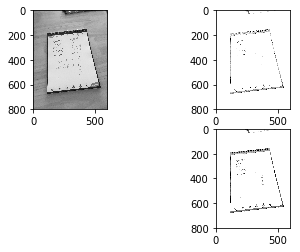

In [7]:
# img = img2
img = get_image(gray_image = True)
plt.subplot(221), plt.imshow(img, cmap='gray')
kernel = np.array([[0, -1, 0], [-1, 8, -1], [0, -1, 0]])
img = cv2.filter2D(img, -1, kernel)
plt.subplot(222), plt.imshow(img, cmap='gray')
# edges = cv2.Canny(img,50, 100, apertureSize = 3, L2gradient = 0)
# edges = cv2.bitwise_not(edges)
# plt.subplot(223)
# plt.imshow(edges, cmap='gray')

kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.subplot(224)
plt.imshow(opening, cmap='gray')
plt.show()

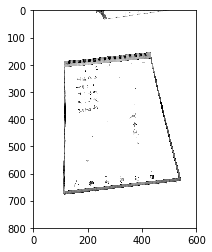

In [8]:
edges = opening
plt.imshow(opening, cmap = 'gray')
# ret,edges = cv2.threshold(img,230,255,cv2.THRESH_BINARY)
# img = cv2.imread("./temp/IMG_9377.JPG", 1)
# # plt.subplot(131)
# # plt.imshow(img)
# plt.subplot(132)
# plt.imshow(img)

# lines = cv2.HoughLines(edges,1,np.pi/180,500)
# for x in range(0, len(lines)):
#     for rho,theta in lines[x]:
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a*rho
#         y0 = b*rho
#         x1 = int(x0 + 1000*(-b))
#         y1 = int(y0 + 1000*(a))
#         x2 = int(x0 - 1000*(-b))
#         y2 = int(y0 - 1000*(a))

#         cv2.line(img,(x1,y1),(x2,y2),(0,100,100),1)
# plt.subplot(133)
# plt.imshow(img)
plt.show()

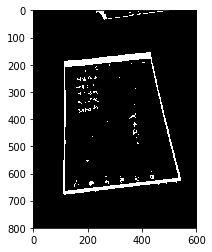

In [9]:
# edges = cv2.dilate(opening,kernel,iterations = 1)
ret,edges = cv2.threshold(edges, 240,255,cv2.THRESH_BINARY_INV)
plt.imshow(edges, cmap = 'gray')
plt.show()

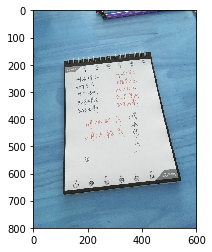

In [10]:
img = get_image()
plt.imshow(img)
plt.show()

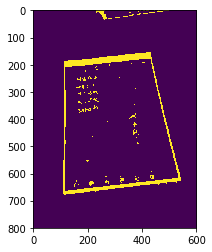

(800, 600)
[[[-3.7300000e+02  2.8972466e+00]]

 [[-3.8100000e+02  2.9146998e+00]]

 [[ 1.1400000e+02  0.0000000e+00]]

 [[ 1.2200000e+02  1.7453292e-02]]

 [[ 6.7800000e+02  1.4486233e+00]]

 [[ 6.8000000e+02  1.4486233e+00]]

 [[ 6.8200000e+02  1.4486233e+00]]

 [[ 6.7500000e+02  1.4660766e+00]]

 [[ 6.8400000e+02  1.4311700e+00]]

 [[ 6.8600000e+02  1.4311700e+00]]

 [[ 6.7100000e+02  1.4835298e+00]]

 [[-3.6200000e+02  2.8797932e+00]]

 [[ 2.2000000e+02  1.4486233e+00]]

 [[ 2.1300000e+02  1.4486233e+00]]

 [[ 2.1200000e+02  1.4835298e+00]]

 [[ 2.2100000e+02  1.4311700e+00]]

 [[ 2.0800000e+02  1.4486233e+00]]

 [[ 2.1500000e+02  1.4486233e+00]]

 [[ 2.1800000e+02  1.4486233e+00]]

 [[ 2.1600000e+02  1.4660766e+00]]

 [[ 2.0200000e+02  1.4835298e+00]]

 [[ 2.0500000e+02  1.4835298e+00]]

 [[ 2.0900000e+02  1.4835298e+00]]

 [[ 2.0400000e+02  1.5009831e+00]]

 [[ 2.2300000e+02  1.4137167e+00]]

 [[ 2.1600000e+02  1.4311700e+00]]

 [[ 2.0600000e+02  1.4486233e+00]]

 [[ 2.1100000e+02

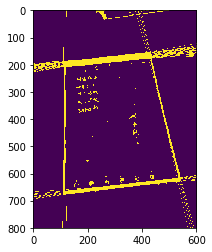

In [11]:
plt.imshow(edges)
plt.show()
print(edges.shape)
lines = cv2.HoughLines(edges,1,np.pi/180,300)
print(lines)
# background = np.zeros((800, 600), np.uint8)
# for x in range(len(lines)):
#     for rho,theta in lines[x]:
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a*rho
#         y0 = b*rho
#         x1 = int(x0 + 1000*(-b))
#         y1 = int(y0 + 1000*(a))
#         x2 = int(x0 - 1000*(-b))
#         y2 = int(y0 - 1000*(a))

#         cv2.line(edges,(x1,y1),(x2,y2),(255,255,255),1)




plt.imshow(edges)
plt.show()

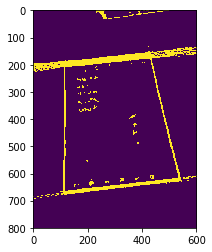

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


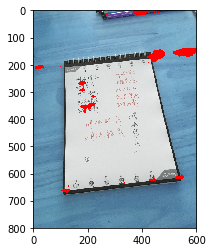

In [219]:
median = cv2.medianBlur(edges,3)
dst = cv2.cornerHarris(median,40,5,0.04)
plt.imshow(median)
plt.show()
# dst = cv2.dilate(dst,None)
print(dst)
img[dst>0.3*dst.max()]=[255,0,0]
plt.imshow(img)
plt.show()